# MWA Beam Demo

This notebook visualises the MWA beam pattern with `pyuvdata.UVBeam`.

It loads the hdf5 beam file and plots: 
1. The zenith beam pattern for a given frequency and polarization (assume all zero delays)
2. The pointed beam pattern.

This is intended to run in JupyterLab. A container with all the dependencies is available
for both x86 and arm64 (Apple M-series compatible). 

You can start the server with:

```bash
docker run --rm -it -p 8888:8888 \
    -w /home/jovyan/Karabo-Pipeline/karabo/examples \
    ghcr.io/d3v-null/sp5505-karabo-pipeline:sha-bccd86b-pretest
```

Then open the notebook in your browser at `http://127.0.0.1:8888/lab?token=...`

## Download the HDF5 file

First, we need to download the MWA beam file.

In [1]:
import os

beam_file = 'mwa_full_embedded_element_pattern.h5'

if not os.path.exists(beam_file):
    print(f"Downloading {beam_file}...")
    !wget http://ws.mwatelescope.org/static/mwa_full_embedded_element_pattern.h5
    print("Download complete!")
else:
    print(f"{beam_file} already exists.")


mwa_full_embedded_element_pattern.h5 already exists.


## Import required modules

Import the plotting function from the `mwa_pyuvbeam` module.

In [2]:
from mwa_pyuvbeam import plot_beam, read_beam

print("Imports successful!")

Imports successful!


## Plot 1: Zenith beam pattern

Assume all zero delays, this is not correct.

invalid value encountered in arcsin


Saved beam plot: mwa_beam_181MHz_x_zenith_sin.png


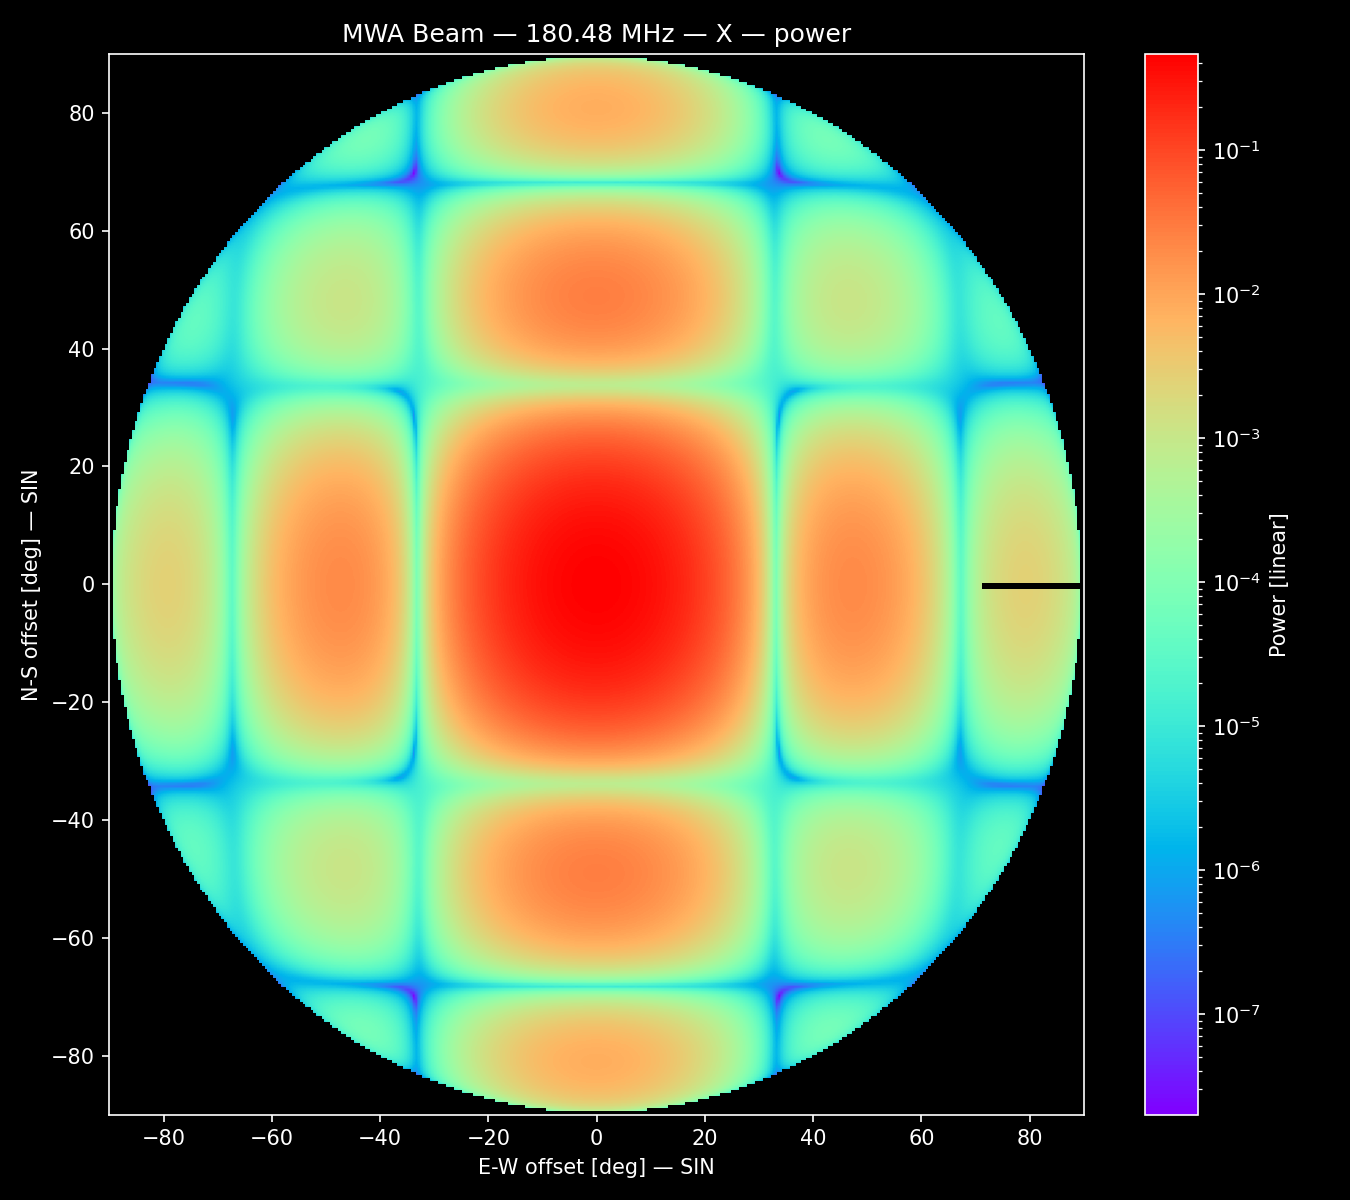

In [3]:
from IPython.display import Image, display

delays = None
beam = read_beam(beam_file, delays=delays)

plot_beam(
    beam,
    freq_mhz=181,
    pol='X',
    out='mwa_beam_181MHz_x_zenith_sin.png',
    show=True,
    quantity='power',
    vmin=None,
    vmax=None,
    dpi=150,
    debug=False,
    pointing_za_deg=0.0,
    pointing_az_deg=0.0,
    projection='SIN',
    proj_size_deg=90.0,
)
display(Image(filename='mwa_beam_181MHz_x_zenith_sin.png'))

## Plot 2: Use delays from metafits to point the beam

we'll need to grab the delays from the metafits file.

Assumptions: all tiles have the same delays (not always true)

1184702048.metafits already exists.
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]


invalid value encountered in arcsin


Saved beam plot: mwa_beam_181MHz_x_pointed_sin.png


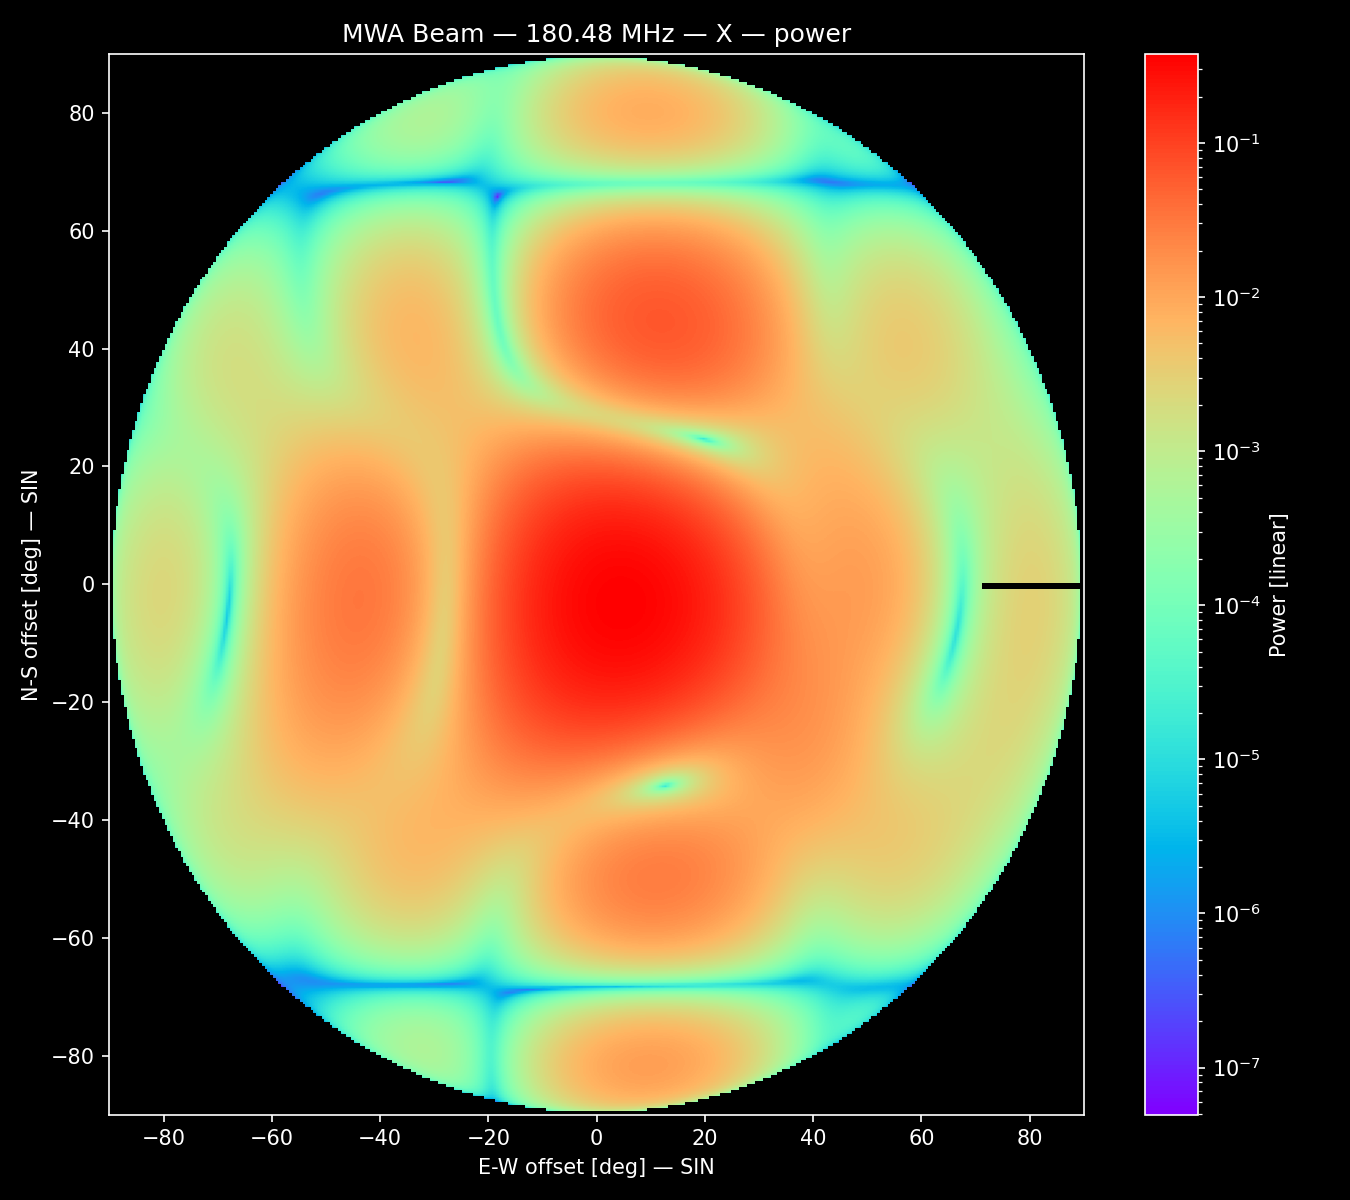

In [ ]:
# curl -L -o "$metafits" $'http://ws.mwatelescope.org/metadata/fits?obs_id='${obsid}

metafits_file = '1184702048.metafits'

if not os.path.exists(metafits_file):
    print(f"Downloading {metafits_file}...")
    !wget -O 1184702048.metafits http://ws.mwatelescope.org/metadata/fits?obs_id=1184702048
    print("Download complete!")
else:
    print(f"{metafits_file} already exists.")

# read metafits file
from astropy.io import fits

with fits.open(metafits_file) as hdul:
    data = hdul['TILEDATA'].data

print(data[0]['Delays'])

# reformat delays to be in the same shape that UVBeam expects
import numpy as np
delays = np.array([data[0]['Delays'], data[0]['Delays']])

beam = read_beam(beam_file, delays=delays)

plot_beam(
    beam,
    freq_mhz=181,
    pol='X',
    out='mwa_beam_181MHz_x_pointed_sin.png',
    show=True,
    quantity='power',
    vmin=None,
    vmax=None,
    dpi=150,
    debug=False,
    pointing_za_deg=0.0,
    pointing_az_deg=0.0,
    projection='SIN',
    proj_size_deg=90.0,
)
display(Image(filename='mwa_beam_181MHz_x_pointed_sin.png'))